# Classification in PyTorch

### Importing the libraries

In [215]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Classification

### What is Classification?

Classifying a data and finding which category it belongs to.

Types:
1. Binary Classification
2. Multiclass Classification
3. Multilabel Classification


#### Difference between Multilabel and Multiclass Classification

Multiclass - Has more than one label and data is put into one of those labels<br>
Multilabel - Many labels like `#python` or `#deep-learning`  so we should find all the corresponding labels

#### Inputs and Outputs of a Classification Problem

##### INPUT:
Let us say we have to classify images, we then square the image and put them into (224,224,3) the height, width and color channels(RGB)<br>
We actually convert the images into numbers like matrices and then clasify them using a neural network

#### OUTPUT:
Prediction probabilities of the data belonging to a class

Say our images is of Biriyani, Parotta and Dosa. <br>

We input the images into the model in the form of ```(batch_size, color_channels, height, width)``` (batch_size is the number of images our model looks at in one go).<br>

Then we allow the model to find patterns in the data.<br>

Then the model outputs a probabilty matrix kind of an output, `ex: [0.92,0.03,0.05]`, where the outputs are the probabilities of Biriyani, Parotta and Dosa respectively

# CODE

In [216]:
# Let us start writing code

# Step 1: DATA
from sklearn.datasets import make_circles

# Make a 1000 samples
n_samples = 10000

# Create Circles using the make_circles function
X,y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

In [217]:
len(X), len(y)

(10000, 10000)

In [218]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[ 0.0464692   0.82477834]
 [ 1.00506323 -0.43335153]
 [-0.58348442  0.79452834]
 [ 0.98478298 -0.32517879]
 [ 0.82993028 -0.54722305]]
First 5 samples of y: [1 0 0 0 0]


In [219]:
# Creating a dataframe out of the data

circles = pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"label":y})

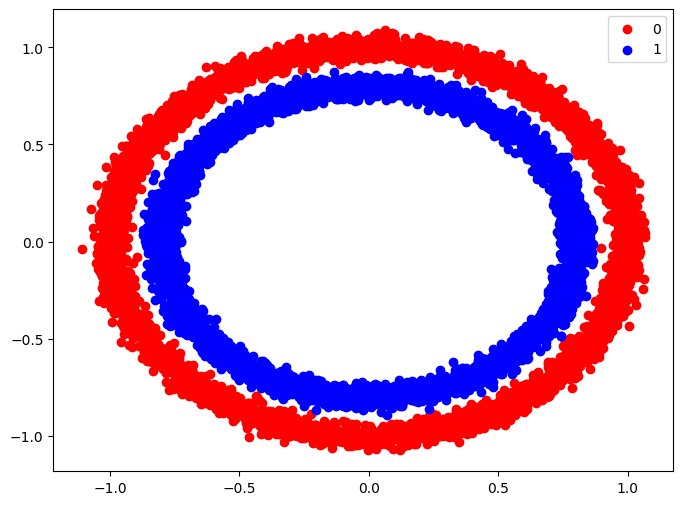

In [220]:
# Circles is a dataframe with 3 columns
# X1 - X coordinate of the point
# X2 - Y coordinate of the point
# label - The class of the point
# Let us plot the data
plt.figure(figsize=(8,6))
plt.scatter(X[y==0][:,0],X[y==0][:,1],color='red',label='0')
plt.scatter(X[y==1][:,0],X[y==1][:,1],color='blue',label='1')
plt.legend()

In [221]:
# Turn data into tensors
X = torch.from_numpy(X).to(torch.float)
y = torch.from_numpy(y).to(torch.float)

In [222]:
X

tensor([[ 0.0465,  0.8248],
        [ 1.0051, -0.4334],
        [-0.5835,  0.7945],
        ...,
        [ 0.6855,  0.3730],
        [ 0.4744,  0.8849],
        [-0.6744,  0.2609]])

In [223]:
y

tensor([1., 0., 0.,  ..., 1., 0., 1.])

In [224]:
# Splitting data into Training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y,shuffle=True)

In [225]:
len(X_train), len(X_test), len(y_train), len(y_test)

(8000, 2000, 8000, 2000)

## Building the model

Let us build a model to classify the blue and red dots
SOP:

1. Set up device agnostic code
2. Construct a model (subclass from `nn.Module`)
3. Define an optimizer and loss function
4. Create a train and test loop

In [226]:
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

##### Building the model from scratch

##### Building the model

1. Subclass `nn.Module`
2. Create 2 `nn.Linear()` layers
3. Define our `forward()` method, because we're subclassing the `nn.Module`.
4. Instantiate an instance of our model class and send it to target device

In [227]:
# Let us create our own Class for the LogisticRegressionModel

class CircleModelV1(nn.Module):
    """
    Our own custom Logistic Regression Model for solving the make_circles problem.
    This inherits the ``torch.nn.Module`` to implement rather inherit a lot of functionalities we intend to create.
    """

    def __init__(self):
        super().__init__()
        
        # Create 2 nn.Linear layers to handle our data
        self.layer_1 = nn.Linear(in_features=2, out_features=8, dtype=torch.float) # Converts data of shape 2 to data of shape 8
        # Initially our model had 2 datapoints to learn from, now we have 8 datapoints to learn from, this uses Linear Transformation y = x* A.Transpose + b 

        # Here the out_features of previous layers and in_features of current layers should be equal
        self.layer_2 = nn.Linear(in_features=8,out_features=1,dtype=torch.float)

    def forward(self, x: torch.Tensor):
        """ 
        Passes the outputs of layer 1 to layer 2 and then returns the output of layer 2. 
        """

        return self.layer_2(self.layer_1(x))
    

    

In [228]:
model_0 = CircleModelV1().to(device)
model_0

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=1, bias=True)
)

In [229]:
next(model_0.parameters())

Parameter containing:
tensor([[-0.6252, -0.1181],
        [-0.1149,  0.4141],
        [ 0.3341, -0.0655],
        [-0.4591, -0.2644],
        [ 0.0869,  0.2484],
        [-0.3417,  0.5780],
        [ 0.2755,  0.4204],
        [-0.4031, -0.0964]], requires_grad=True)

# Using Sequential

Let us use the `nn.Sequential()` to build this model.

This will reduce the lines of code written and will also be help us to purely write this without OOPS and reduce a lot of jargon in

In [230]:
from torch.nn import Sequential
from torch.nn import Linear


model = Sequential(
    Linear(in_features=2, out_features=8, dtype=torch.float),
    Linear(in_features=8, out_features=1,dtype=torch.float)
)
model

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=1, bias=True)
)

In [231]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0750, -0.5395],
         [ 0.5359,  0.6082],
         [ 0.5944,  0.5089],
         [ 0.2836,  0.0676],
         [ 0.4493,  0.6917],
         [ 0.0227, -0.2410],
         [-0.3003,  0.4244],
         [ 0.0899,  0.6825]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2023, -0.2900, -0.6026, -0.6937,  0.6284, -0.0792, -0.0345,  0.1055],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.1855, -0.2967,  0.3458,  0.1840,  0.2164, -0.1160,  0.2478, -0.3167]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.1249], requires_grad=True)]

In [232]:
out = X_train.matmul(model[0].weight.T) + model[0].bias
# Now we have the output of the first layer, we can pass this to the second layer
# The output of the first layer is the input to the second layer
model[1](out)
# this is the same as model(X_train)


tensor([[-0.2934],
        [-0.2880],
        [-0.2048],
        ...,
        [-0.2815],
        [-0.1581],
        [-0.1606]], grad_fn=<AddmmBackward0>)

In [233]:
# Let us find the parameters of the model
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0750, -0.5395],
                      [ 0.5359,  0.6082],
                      [ 0.5944,  0.5089],
                      [ 0.2836,  0.0676],
                      [ 0.4493,  0.6917],
                      [ 0.0227, -0.2410],
                      [-0.3003,  0.4244],
                      [ 0.0899,  0.6825]])),
             ('0.bias',
              tensor([ 0.2023, -0.2900, -0.6026, -0.6937,  0.6284, -0.0792, -0.0345,  0.1055])),
             ('1.weight',
              tensor([[ 0.1855, -0.2967,  0.3458,  0.1840,  0.2164, -0.1160,  0.2478, -0.3167]])),
             ('1.bias', tensor([-0.1249]))])

In [234]:
untrained_preds = model(X_train)

In [235]:
len(untrained_preds)

8000

In [236]:
untrained_preds.shape

torch.Size([8000, 1])

In [237]:
with torch.inference_mode():
    untrained_preds = model(X_train)

In [238]:
rmse = (((y_train - untrained_preds)**2).mean())**0.5
mse = ((y_train - untrained_preds)**2).mean()
mae = (y_train-untrained_preds).abs().sum()

print(f"RMSE: {rmse}  |  MSE: {mse}  |  MAE: {mae}")

RMSE: 0.8900818824768066  |  MSE: 0.7922457456588745  |  MAE: 47011792.0


## Selecting the Loss Function and Optimizer

Loss Function: For Binary Classification, we have different loss functions such as the `BinaryCrossEntropy` or `CrossEntropy`

Optimizer: We can use optimizers like the `Adam` or the `SGD`, they are the most common loss function for Classification.

In [239]:
# Setup thhe loss function

"""Difference between BCELoss and BCEWithLogitsLoss is that BCE requires the input to have gone through a Sigmoid function, 
but the BCEWithLogitsLoss does not require so

Raw output of model is called a logit, to convert it into a prediction probabilities, we use Sigmoid function.
"""

loss_fn = nn.BCEWithLogitsLoss() # It has the sigmoid activation function built in

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [240]:
# Calculate the accuracy
# Accuracy: (TP / (TP+TN))*100
# Calculate accuracy - out of 100 examples, what percentage does our model get right? 
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() 
  acc = (correct/len(y_pred)) * 100
  return acc

In [241]:
# Train the model

epochs = 10000
train_loss_array = list()
test_loss_array = list()
train_acc_array = list()
test_acc_array = list()

for epoch in range(epochs):
    # Put the model in training mode
    model.train()

    # Do the forward pass
    y_logits = model(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    # Calculate the loss
    loss = loss_fn(y_logits, y_train)
    
    acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

    # Zero Gradients of the optimizer
    optimizer.zero_grad()

    # Backpropagate the loss
    loss.backward()

    # Step the optimizer
    optimizer.step()

    model.eval()

    # Testing loop
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        testing_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_pred=test_preds, y_true=y_test)

    train_loss_array.append(loss)
    test_loss_array.append(testing_loss)
    train_acc_array.append(acc)
    test_acc_array.append(test_acc)
    
    print(f"Epoch: {epoch} | Training Loss: {loss:.3f}\t| Testing Loss: {testing_loss:.3f}\t| Training Accuracy: {acc:.2f}%\t| Testing Accuracy: {test_acc:.2f}%")
        

Epoch: 0 | Training Loss: 0.700	| Testing Loss: 0.699	| Training Accuracy: 50.00%	| Testing Accuracy: 50.00%
Epoch: 1 | Training Loss: 0.699	| Testing Loss: 0.698	| Training Accuracy: 50.00%	| Testing Accuracy: 50.00%
Epoch: 2 | Training Loss: 0.699	| Testing Loss: 0.697	| Training Accuracy: 50.00%	| Testing Accuracy: 50.00%
Epoch: 3 | Training Loss: 0.698	| Testing Loss: 0.697	| Training Accuracy: 50.00%	| Testing Accuracy: 50.00%
Epoch: 4 | Training Loss: 0.697	| Testing Loss: 0.696	| Training Accuracy: 50.00%	| Testing Accuracy: 50.00%
Epoch: 5 | Training Loss: 0.697	| Testing Loss: 0.696	| Training Accuracy: 50.00%	| Testing Accuracy: 50.00%
Epoch: 6 | Training Loss: 0.696	| Testing Loss: 0.695	| Training Accuracy: 50.00%	| Testing Accuracy: 50.00%
Epoch: 7 | Training Loss: 0.696	| Testing Loss: 0.695	| Training Accuracy: 50.00%	| Testing Accuracy: 50.00%
Epoch: 8 | Training Loss: 0.695	| Testing Loss: 0.695	| Training Accuracy: 50.00%	| Testing Accuracy: 50.00%
Epoch: 9 | Training

In [242]:
import sys
sys.path.append("..")

from helper_functions import plot_decision_boundary

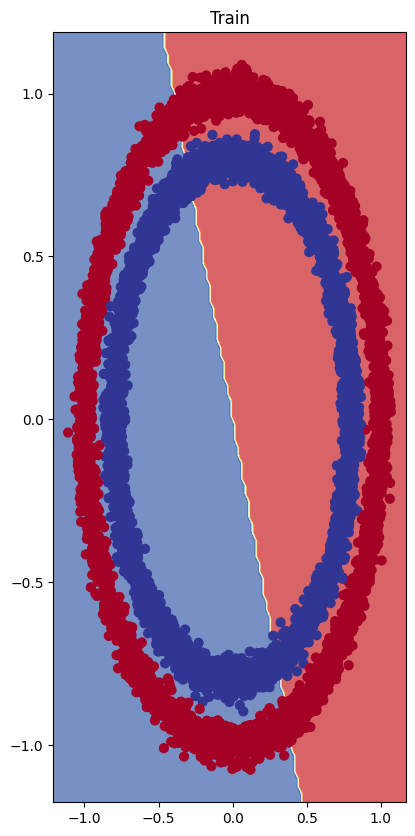

In [243]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model,X_train,y_train)
plt.show()

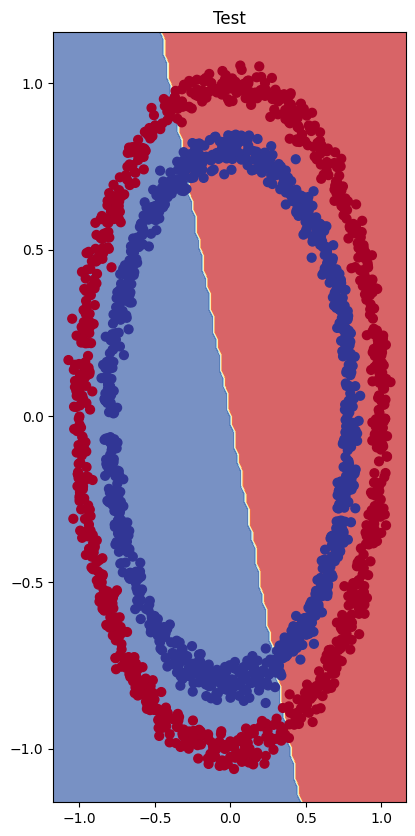

In [244]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(model,X_test,y_test)
plt.show()

In [248]:
torch.sigmoid(torch.Tensor([0.4]))
# Sigmoid formula

tensor([0.5987])

In [252]:
1/(1+torch.exp(-torch.Tensor([0.4])))
# Writing our sigmoid code

tensor([0.5987])